In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import warnings

warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('Dataset.csv')

print(df.shape)
df.head()

(1206, 11)


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [59]:
df_cleaned = df.dropna()

cc_pattern_mask = df_cleaned['CC/Battery Capacity'].str.match(r'^\d+(?:,\d+)* cc$', na=False)
df_cleaned = df_cleaned[cc_pattern_mask]

df_cleaned['CC'] = df_cleaned['CC/Battery Capacity'].str.replace(',', '').str.replace(' cc', '').astype(int)
df_cleaned = df_cleaned[df_cleaned['CC'] <= 8000]

def clean_horsepower(value):
    if pd.isna(value):
        return value
    
    value_str = str(value).strip()
    
    # Handle ranges like "70-85 hp"
    range_match = re.search(r'(\d+)\s*-\s*(\d+)\s*hp', value_str, re.IGNORECASE)
    if range_match:
        return int((int(range_match.group(1)) + int(range_match.group(2))) / 2)
    
    # Handle single values like "963 hp"
    single_match = re.search(r'(\d+)\s*hp', value_str, re.IGNORECASE)
    if single_match:
        return int(single_match.group(1))
    
    return value

df_cleaned['HorsePower'] = df_cleaned['HorsePower'].apply(clean_horsepower)

df_cleaned['Total Speed'] = df_cleaned['Total Speed'].str.replace(' km/h', '').astype(int)

df_cleaned['Performance(0 - 100 )KM/H'] = df_cleaned['Performance(0 - 100 )KM/H'].str.replace(' sec', '').astype(float)

def clean_price(value):
    if pd.isna(value):
        return value
    
    value_str = str(value).strip()
    
    # Handle ranges like "$12,000-$15,000"
    range_match = re.search(r'\$([\d,]+)\s*-\s*\$?([\d,]+)', value_str)
    if range_match:
        num1 = int(range_match.group(1).replace(',', ''))
        num2 = int(range_match.group(2).replace(',', ''))
        return int((num1 + num2) / 2)
    
    # Handle single values like "$1,100,000"
    single_match = re.search(r'\$([\d,]+)', value_str)
    if single_match:
        return int(single_match.group(1).replace(',', ''))
    
    return value

df_cleaned['Cars Prices'] = df_cleaned['Cars Prices'].apply(clean_price)
df_cleaned = df_cleaned[df_cleaned['Cars Prices'] <= 1500000]

def clean_torque(value):
    if pd.isna(value):
        return value
    
    value_str = str(value).strip()
    
    # Handle ranges like "100 - 140 Nm"
    range_match = re.search(r'(\d+)\s*-\s*(\d+)\s*Nm', value_str, re.IGNORECASE)
    if range_match:
        num1 = int(range_match.group(1))
        num2 = int(range_match.group(2))
        return int((num1 + num2) / 2)
    
    # Handle single values like "900 Nm"
    single_match = re.search(r'(\d+)\s*Nm', value_str, re.IGNORECASE)
    if single_match:
        return int(single_match.group(1))
    
    return value

df_cleaned['Torque'] = df_cleaned['Torque'].apply(clean_torque)

df_cleaned = df_cleaned.drop('Engines', axis=1)
df_cleaned = df_cleaned.drop('CC/Battery Capacity', axis=1)
df_cleaned = df_cleaned.drop('Fuel Types', axis=1)

print(df_cleaned.shape)
df_cleaned.head()

(958, 9)


,Company Names,Cars Names,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,CC
0,FERRARI,SF90 STRADALE,963,340,2.5,1100000,2,800,3990
1,ROLLS ROYCE,PHANTOM,563,250,5.3,460000,5,900,6749
2,Ford,KA+,77,165,10.5,13500,5,120,1200
3,MERCEDES,GT 63 S,630,250,3.2,161000,4,900,3982
4,AUDI,AUDI R8 Gt,602,320,3.6,253290,2,560,5204


Mean: 2943.95
Median: 2494.00
Mode: 2000.00
Skewness: 1.0048


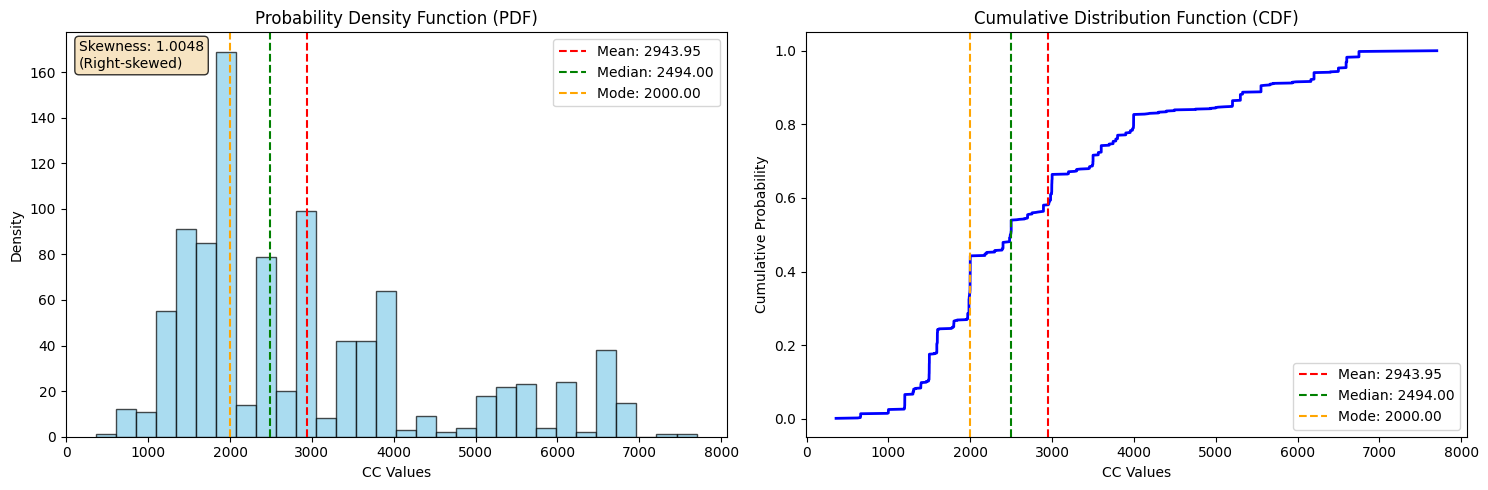

In [ ]:
# Calculate statistics
mean_cc = df_cleaned['CC'].mean()
median_cc = df_cleaned['CC'].median()
mode_cc = df_cleaned['CC'].mode().iloc[0] if not df_cleaned['CC'].mode().empty else None
skewness = df_cleaned['CC'].skew()
kurtosis = df_cleaned['CC'].kurtosis()

print(f"Mean: {mean_cc:.2f}")
print(f"Median: {median_cc:.2f}")
print(f"Mode: {mode_cc:.2f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot PDF (Histogram)
ax1.hist(df_cleaned['CC'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('CC Values')
ax1.set_ylabel('Density')
ax1.axvline(mean_cc, color='red', linestyle='--', label=f'Mean: {mean_cc:.2f}')
ax1.axvline(median_cc, color='green', linestyle='--', label=f'Median: {median_cc:.2f}')
ax1.axvline(mode_cc, color='orange', linestyle='--', label=f'Mode: {mode_cc:.2f}')
ax1.legend()
ax1.ticklabel_format(style='plain', axis='x')

# Add skewness and kurtosis interpretation as text
skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
kurt_interpretation = "Heavy-tailed" if kurtosis > 3 else "Light-tailed" if kurtosis < 3 else "Normal-like"
ax1.text(0.02, 0.98, f'Skewness: {skewness:.4f}\n({skew_interpretation})\nKurtosis: {kurtosis:.4f}\n({kurt_interpretation})', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot CDF
sorted_cc = np.sort(df_cleaned['CC'])
y = np.arange(1, len(sorted_cc) + 1) / len(sorted_cc)
ax2.plot(sorted_cc, y, linewidth=2, color='blue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('CC Values')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(mean_cc, color='red', linestyle='--', label=f'Mean: {mean_cc:.2f}')
ax2.axvline(median_cc, color='green', linestyle='--', label=f'Median: {median_cc:.2f}')
ax2.axvline(mode_cc, color='orange', linestyle='--', label=f'Mode: {mode_cc:.2f}')
ax2.legend()
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

Mean: 283.19
Median: 240.00
Mode: 355.00
Skewness: 0.9901


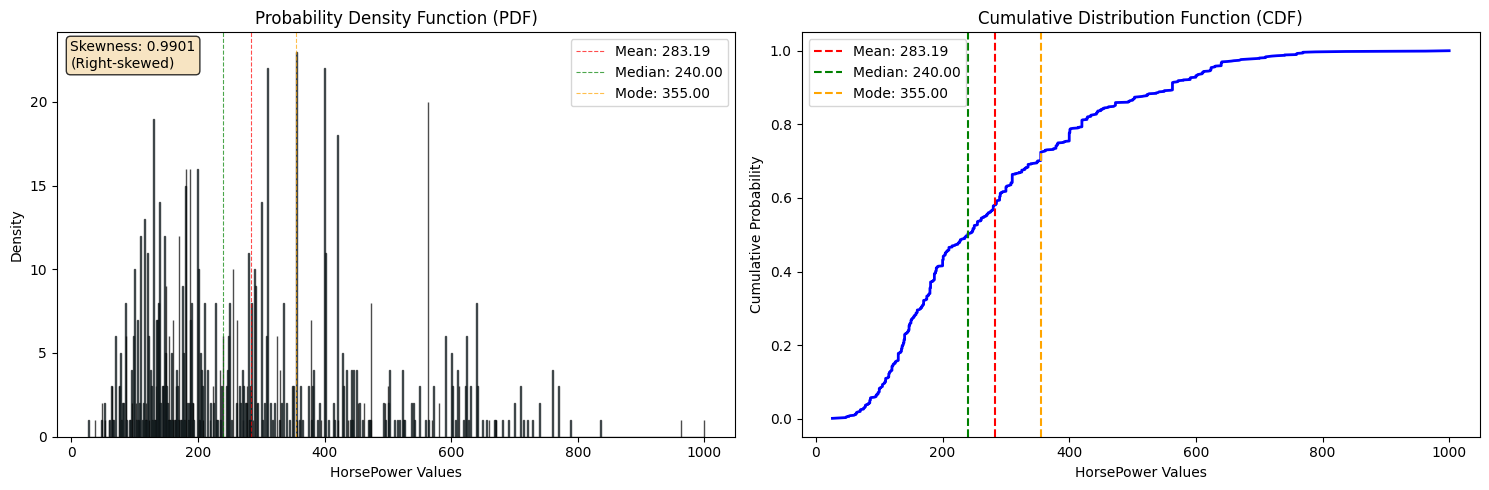

In [ ]:
# Calculate statistics
mean_horsepower = df_cleaned['HorsePower'].mean()
median_horsepower = df_cleaned['HorsePower'].median()
mode_horsepower = df_cleaned['HorsePower'].mode().iloc[0] if not df_cleaned['HorsePower'].mode().empty else None
skewness = df_cleaned['HorsePower'].skew()
kurtosis = df_cleaned['HorsePower'].kurtosis()

print(f"Mean: {mean_horsepower:.2f}")
print(f"Median: {median_horsepower:.2f}")
print(f"Mode: {mode_horsepower:.2f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot PDF (Histogram)
ax1.hist(df_cleaned['HorsePower'], bins=800, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('HorsePower Values')
ax1.set_ylabel('Density')
ax1.axvline(mean_horsepower, color='red', linestyle='--', linewidth=0.8, alpha=0.7, label=f'Mean: {mean_horsepower:.2f}')
ax1.axvline(median_horsepower, color='green', linestyle='--', linewidth=0.8, alpha=0.7, label=f'Median: {median_horsepower:.2f}')
ax1.axvline(mode_horsepower, color='orange', linestyle='--', linewidth=0.8, alpha=0.7, label=f'Mode: {mode_horsepower:.2f}')
ax1.legend()
ax1.ticklabel_format(style='plain', axis='x')

# Add skewness and kurtosis interpretation as text
skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
kurt_interpretation = "Heavy-tailed" if kurtosis > 3 else "Light-tailed" if kurtosis < 3 else "Normal-like"
ax1.text(0.02, 0.98, f'Skewness: {skewness:.4f}\n({skew_interpretation})\nKurtosis: {kurtosis:.4f}\n({kurt_interpretation})', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot CDF
sorted_horsepower = np.sort(df_cleaned['HorsePower'])
y = np.arange(1, len(sorted_horsepower) + 1) / len(sorted_horsepower)
ax2.plot(sorted_horsepower, y, linewidth=2, color='blue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('HorsePower Values')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(mean_horsepower, color='red', linestyle='--', label=f'Mean: {mean_horsepower:.2f}')
ax2.axvline(median_horsepower, color='green', linestyle='--', label=f'Median: {median_horsepower:.2f}')
ax2.axvline(mode_horsepower, color='orange', linestyle='--', label=f'Mode: {mode_horsepower:.2f}')
ax2.legend()
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

Mean: 217.07
Median: 205.00
Mode: 250.00
Skewness: 0.7410


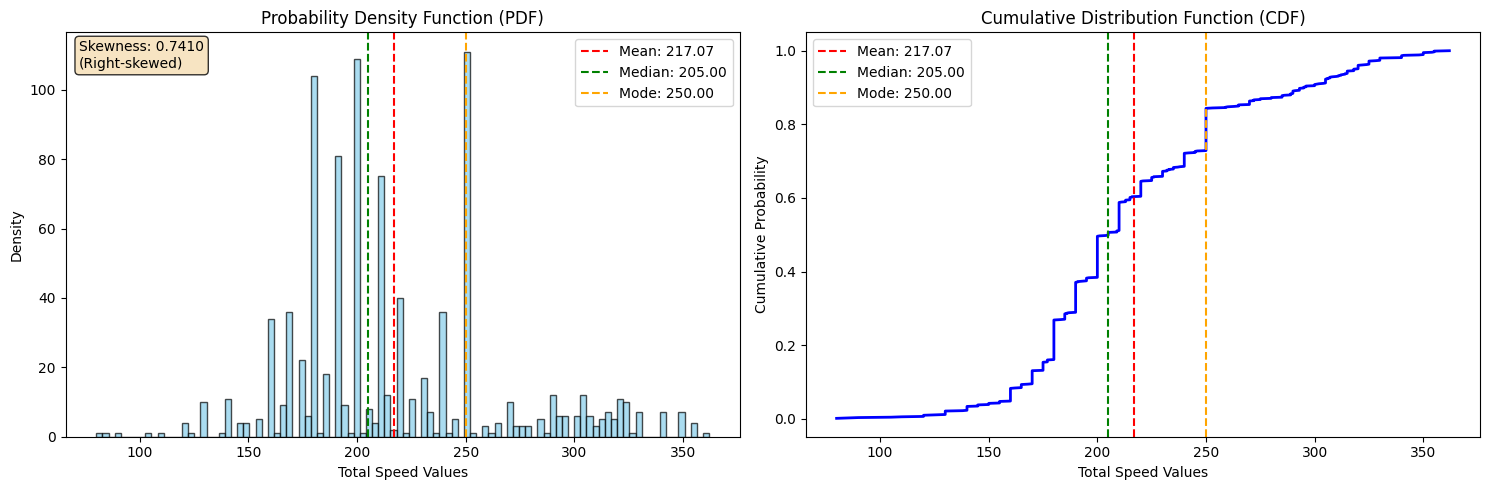

In [ ]:
# Calculate statistics
mean_speed = df_cleaned['Total Speed'].mean()
median_speed = df_cleaned['Total Speed'].median()
mode_speed = df_cleaned['Total Speed'].mode().iloc[0] if not df_cleaned['Total Speed'].mode().empty else None
skewness = df_cleaned['Total Speed'].skew()
kurtosis = df_cleaned['Total Speed'].kurtosis()

print(f"Mean: {mean_speed:.2f}")
print(f"Median: {median_speed:.2f}")
print(f"Mode: {mode_speed:.2f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot PDF (Histogram)
ax1.hist(df_cleaned['Total Speed'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('Total Speed Values')
ax1.set_ylabel('Density')
ax1.axvline(mean_speed, color='red', linestyle='--', label=f'Mean: {mean_speed:.2f}')
ax1.axvline(median_speed, color='green', linestyle='--', label=f'Median: {median_speed:.2f}')
ax1.axvline(mode_speed, color='orange', linestyle='--', label=f'Mode: {mode_speed:.2f}')
ax1.legend()
ax1.ticklabel_format(style='plain', axis='x')

# Add skewness and kurtosis interpretation as text
skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
kurt_interpretation = "Heavy-tailed" if kurtosis > 3 else "Light-tailed" if kurtosis < 3 else "Normal-like"
ax1.text(0.02, 0.98, f'Skewness: {skewness:.4f}\n({skew_interpretation})\nKurtosis: {kurtosis:.4f}\n({kurt_interpretation})', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot CDF
sorted_speed = np.sort(df_cleaned['Total Speed'])
y = np.arange(1, len(sorted_speed) + 1) / len(sorted_speed)
ax2.plot(sorted_speed, y, linewidth=2, color='blue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('Total Speed Values')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(mean_speed, color='red', linestyle='--', label=f'Mean: {mean_speed:.2f}')
ax2.axvline(median_speed, color='green', linestyle='--', label=f'Median: {median_speed:.2f}')
ax2.axvline(mode_speed, color='orange', linestyle='--', label=f'Mode: {mode_speed:.2f}')
ax2.legend()
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

Mean: 7.79
Median: 7.50
Mode: 10.50
Skewness: 1.4656


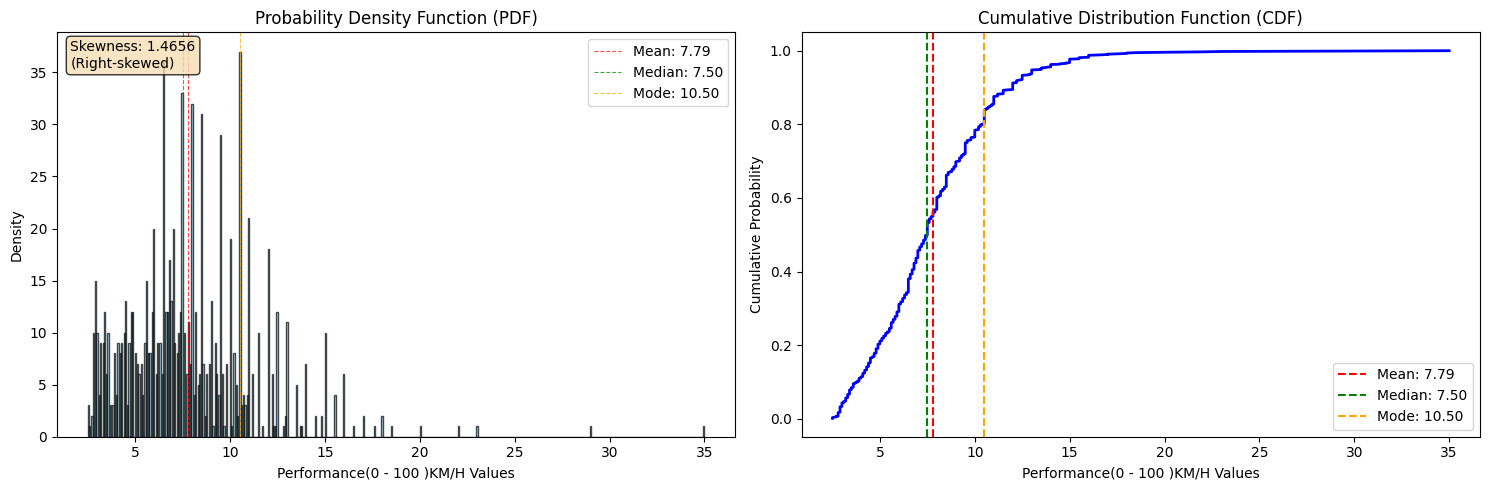

In [ ]:
# Calculate statistics
mean_performance = df_cleaned['Performance(0 - 100 )KM/H'].mean()
median_performance = df_cleaned['Performance(0 - 100 )KM/H'].median()
mode_performance = df_cleaned['Performance(0 - 100 )KM/H'].mode().iloc[0] if not df_cleaned['Performance(0 - 100 )KM/H'].mode().empty else None
skewness = df_cleaned['Performance(0 - 100 )KM/H'].skew()
kurtosis = df_cleaned['Performance(0 - 100 )KM/H'].kurtosis()

print(f"Mean: {mean_performance:.2f}")
print(f"Median: {median_performance:.2f}")
print(f"Mode: {mode_performance:.2f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot PDF (Histogram)
ax1.hist(df_cleaned['Performance(0 - 100 )KM/H'], bins=500, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('Performance(0 - 100 )KM/H Values')
ax1.set_ylabel('Density')
ax1.axvline(mean_performance, color='red', linestyle='--', linewidth=0.8, alpha=0.7, label=f'Mean: {mean_performance:.2f}')
ax1.axvline(median_performance, color='green', linestyle='--', linewidth=0.8, alpha=0.7, label=f'Median: {median_performance:.2f}')
ax1.axvline(mode_performance, color='orange', linestyle='--', linewidth=0.8, alpha=0.7, label=f'Mode: {mode_performance:.2f}')
ax1.legend()
ax1.ticklabel_format(style='plain', axis='x')

# Add skewness and kurtosis interpretation as text
skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
kurt_interpretation = "Heavy-tailed" if kurtosis > 3 else "Light-tailed" if kurtosis < 3 else "Normal-like"
ax1.text(0.02, 0.98, f'Skewness: {skewness:.4f}\n({skew_interpretation})\nKurtosis: {kurtosis:.4f}\n({kurt_interpretation})', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot CDF
sorted_performance = np.sort(df_cleaned['Performance(0 - 100 )KM/H'])
y = np.arange(1, len(sorted_performance) + 1) / len(sorted_performance)
ax2.plot(sorted_performance, y, linewidth=2, color='blue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('Performance(0 - 100 )KM/H Values')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(mean_performance, color='red', linestyle='--', label=f'Mean: {mean_performance:.2f}')
ax2.axvline(median_performance, color='green', linestyle='--', label=f'Median: {median_performance:.2f}')
ax2.axvline(mode_performance, color='orange', linestyle='--', label=f'Mode: {mode_performance:.2f}')
ax2.legend()
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

Mean: 79521.76
Median: 40000.00
Mode: 30000.00
Skewness: 4.7339


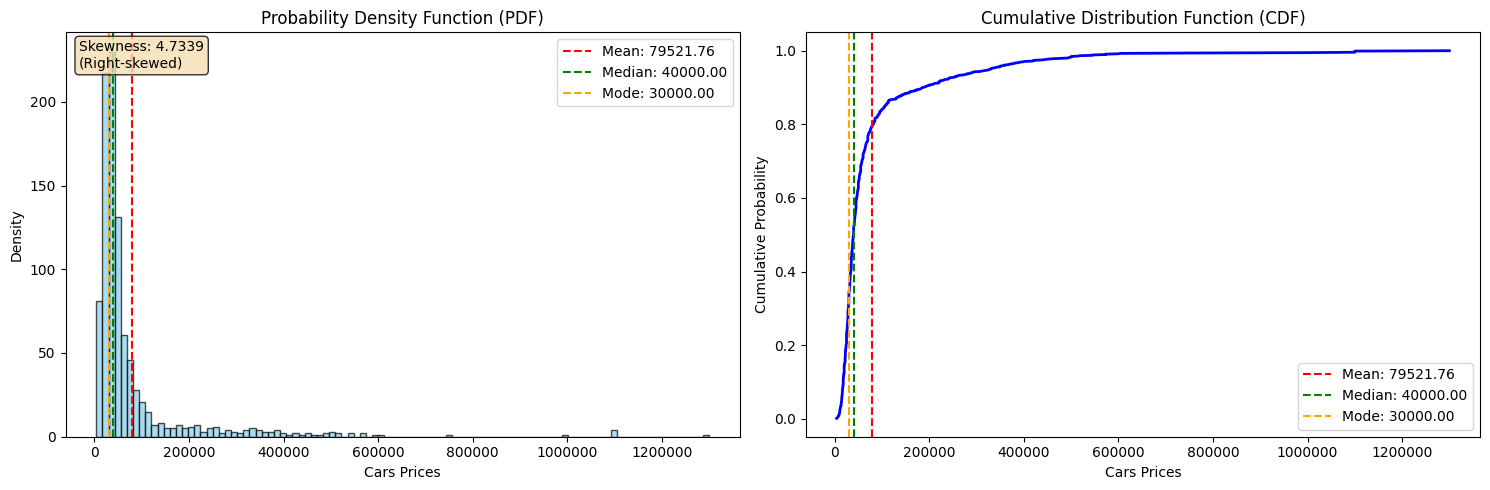

In [ ]:
# Calculate statistics
mean_price = df_cleaned['Cars Prices'].mean()
median_price = df_cleaned['Cars Prices'].median()
mode_price = df_cleaned['Cars Prices'].mode().iloc[0] if not df_cleaned['Cars Prices'].mode().empty else None
skewness = df_cleaned['Cars Prices'].skew()
kurtosis = df_cleaned['Cars Prices'].kurtosis()

print(f"Mean: {mean_price:.2f}")
print(f"Median: {median_price:.2f}")
print(f"Mode: {mode_price:.2f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot PDF (Histogram)
ax1.hist(df_cleaned['Cars Prices'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('Cars Prices')
ax1.set_ylabel('Density')
ax1.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
ax1.axvline(median_price, color='green', linestyle='--', label=f'Median: {median_price:.2f}')
ax1.axvline(mode_price, color='orange', linestyle='--', label=f'Mode: {mode_price:.2f}')
ax1.legend()
ax1.ticklabel_format(style='plain', axis='x')

# Add skewness and kurtosis interpretation as text
skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
kurt_interpretation = "Heavy-tailed" if kurtosis > 3 else "Light-tailed" if kurtosis < 3 else "Normal-like"
ax1.text(0.02, 0.98, f'Skewness: {skewness:.4f}\n({skew_interpretation})\nKurtosis: {kurtosis:.4f}\n({kurt_interpretation})', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot CDF
sorted_price = np.sort(df_cleaned['Cars Prices'])
y = np.arange(1, len(sorted_price) + 1) / len(sorted_price)
ax2.plot(sorted_price, y, linewidth=2, color='blue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('Cars Prices')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
ax2.axvline(median_price, color='green', linestyle='--', label=f'Median: {median_price:.2f}')
ax2.axvline(mode_price, color='orange', linestyle='--', label=f'Mode: {mode_price:.2f}')
ax2.legend()
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

Mean: 4.91
Median: 5.00
Mode: 5.00
Skewness: -0.0687


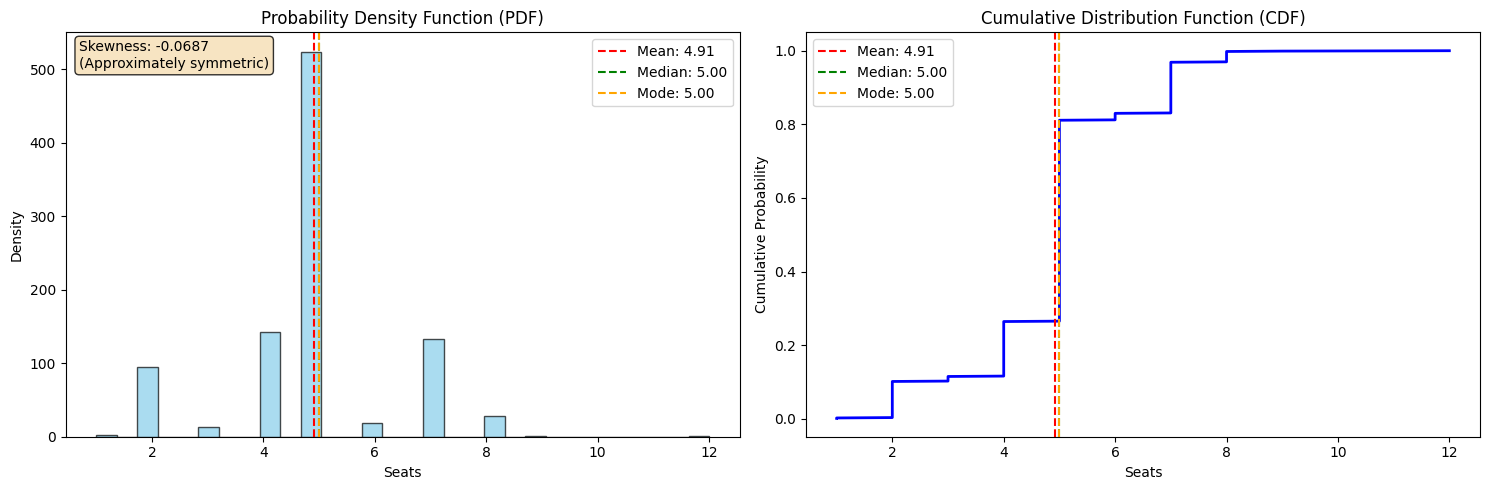

In [ ]:
# Calculate statistics
mean_seats = df_cleaned['Seats'].mean()
median_seats = df_cleaned['Seats'].median()
mode_seats = df_cleaned['Seats'].mode().iloc[0] if not df_cleaned['Seats'].mode().empty else None
skewness = df_cleaned['Seats'].skew()
kurtosis = df_cleaned['Seats'].kurtosis()

print(f"Mean: {mean_seats:.2f}")
print(f"Median: {median_seats:.2f}")
print(f"Mode: {mode_seats:.2f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot PDF (Histogram)
ax1.hist(df_cleaned['Seats'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('Seats')
ax1.set_ylabel('Density')
ax1.axvline(mean_seats, color='red', linestyle='--', label=f'Mean: {mean_seats:.2f}')
ax1.axvline(median_seats, color='green', linestyle='--', label=f'Median: {median_seats:.2f}')
ax1.axvline(mode_seats, color='orange', linestyle='--', label=f'Mode: {mode_seats:.2f}')
ax1.legend()
ax1.ticklabel_format(style='plain', axis='x')

# Add skewness and kurtosis interpretation as text
skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
kurt_interpretation = "Heavy-tailed" if kurtosis > 3 else "Light-tailed" if kurtosis < 3 else "Normal-like"
ax1.text(0.02, 0.98, f'Skewness: {skewness:.4f}\n({skew_interpretation})\nKurtosis: {kurtosis:.4f}\n({kurt_interpretation})', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot CDF
sorted_seats = np.sort(df_cleaned['Seats'])
y = np.arange(1, len(sorted_seats) + 1) / len(sorted_seats)
ax2.plot(sorted_seats, y, linewidth=2, color='blue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('Seats')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(mean_seats, color='red', linestyle='--', label=f'Mean: {mean_seats:.2f}')
ax2.axvline(median_seats, color='green', linestyle='--', label=f'Median: {median_seats:.2f}')
ax2.axvline(mode_seats, color='orange', linestyle='--', label=f'Mode: {mode_seats:.2f}')
ax2.legend()
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

Mean: 401.94
Median: 360.00
Mode: 400.00
Skewness: 0.8700


NameError: name 'pl' is not defined

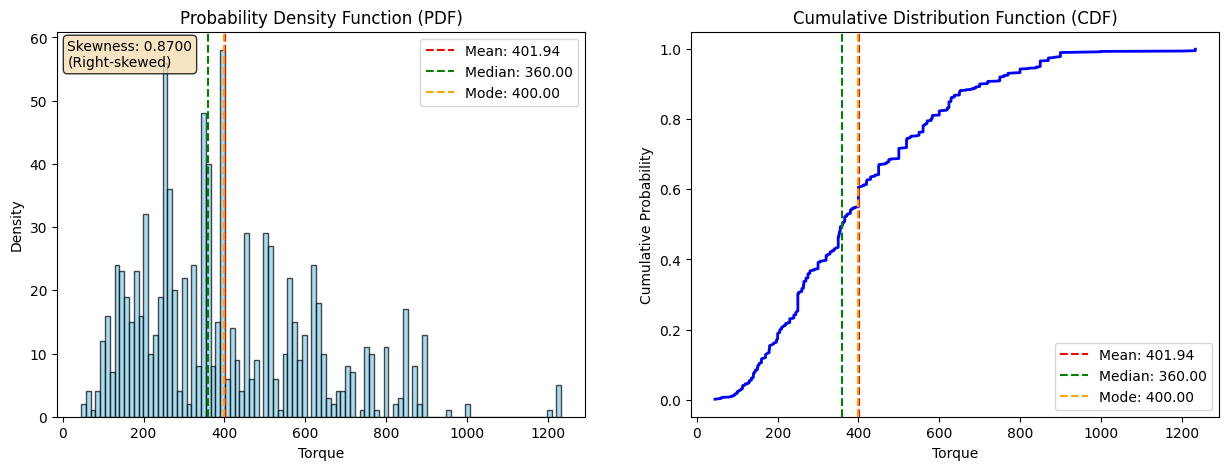

In [ ]:
# Calculate statistics
mean_torque = df_cleaned['Torque'].mean()
median_torque = df_cleaned['Torque'].median()
mode_torque = df_cleaned['Torque'].mode().iloc[0] if not df_cleaned['Torque'].mode().empty else None
skewness = df_cleaned['Torque'].skew()
kurtosis = df_cleaned['Torque'].kurtosis()

print(f"Mean: {mean_torque:.2f}")
print(f"Median: {median_torque:.2f}")
print(f"Mode: {mode_torque:.2f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot PDF (Histogram)
ax1.hist(df_cleaned['Torque'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('Torque')
ax1.set_ylabel('Density')
ax1.axvline(mean_torque, color='red', linestyle='--', label=f'Mean: {mean_torque:.2f}')
ax1.axvline(median_torque, color='green', linestyle='--', label=f'Median: {median_torque:.2f}')
ax1.axvline(mode_torque, color='orange', linestyle='--', label=f'Mode: {mode_torque:.2f}')
ax1.legend()
ax1.ticklabel_format(style='plain', axis='x')

# Add skewness and kurtosis interpretation as text
skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
kurt_interpretation = "Heavy-tailed" if kurtosis > 3 else "Light-tailed" if kurtosis < 3 else "Normal-like"
ax1.text(0.02, 0.98, f'Skewness: {skewness:.4f}\n({skew_interpretation})\nKurtosis: {kurtosis:.4f}\n({kurt_interpretation})', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot CDF
sorted_torque = np.sort(df_cleaned['Torque'])
y = np.arange(1, len(sorted_torque) + 1) / len(sorted_torque)
ax2.plot(sorted_torque, y, linewidth=2, color='blue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('Torque')
ax2.set_ylabel('Cumulative Probability')
ax2.axvline(mean_torque, color='red', linestyle='--', label=f'Mean: {mean_torque:.2f}')
ax2.axvline(median_torque, color='green', linestyle='--', label=f'Median: {median_torque:.2f}')
ax2.axvline(mode_torque, color='orange', linestyle='--', label=f'Mode: {mode_torque:.2f}')
ax2.legend()
ax2.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

In [ ]:
# Define the columns to analyze
columns_to_analyze = ['CC', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Seats', 'Torque']

def calculate_statistics(data):
    """Calculate comprehensive statistics for a dataset"""
    stats_dict = {}
    
    for col in columns_to_analyze:
        if col in data.columns:
            col_data = data[col].dropna()
            
            stats_dict[col] = {
                'mean': col_data.mean(),
                'median': col_data.median(),
                'mode': col_data.mode().iloc[0] if not col_data.mode().empty else None,
                'min': col_data.min(),
                'max': col_data.max(),
                'range': col_data.max() - col_data.min(),
                'variance': col_data.var(),
                'std': col_data.std()
            }
    
    return stats_dict

# Calculate statistics for original data
original_stats = calculate_statistics(df_cleaned)

In [ ]:
# Create a copy of the cleaned dataset for normalization
df_normalized = df_cleaned.copy()

# Apply z-score normalization to the specified columns
for col in columns_to_analyze:
    if col in df_normalized.columns:
        mean_val = df_normalized[col].mean()
        std_val = df_normalized[col].std()
        df_normalized[f'{col}_normalized'] = (df_normalized[col] - mean_val) / std_val

# Calculate statistics for normalized data
normalized_stats = {}
for col in columns_to_analyze:
    if f'{col}_normalized' in df_normalized.columns:
        col_data = df_normalized[f'{col}_normalized'].dropna()
        
        normalized_stats[col] = {
            'mean': col_data.mean(),
            'median': col_data.median(),
            'mode': col_data.mode().iloc[0] if not col_data.mode().empty else None,
            'min': col_data.min(),
            'max': col_data.max(),
            'range': col_data.max() - col_data.min(),
            'variance': col_data.var(),
            'std': col_data.std()
        }

In [ ]:
# Display comparison of statistics before and after normalization
print("=" * 80)
print("COMPARISON OF STATISTICS: BEFORE vs AFTER Z-SCORE NORMALIZATION")
print("=" * 80)

for col in columns_to_analyze:
    if col in original_stats and col in normalized_stats:
        print(f"\n{col.upper()}")
        print("-" * 50)
        
        print(f"{'Statistic':<15} {'Before':<15} {'After':<15}")
        print("-" * 45)
        
        print(f"{'Mean':<15} {original_stats[col]['mean']:<15.4f} {normalized_stats[col]['mean']:<15.4f}")
        print(f"{'Median':<15} {original_stats[col]['median']:<15.4f} {normalized_stats[col]['median']:<15.4f}")
        print(f"{'Mode':<15} {original_stats[col]['mode']:<15.4f} {normalized_stats[col]['mode']:<15.4f}")
        print(f"{'Min':<15} {original_stats[col]['min']:<15.4f} {normalized_stats[col]['min']:<15.4f}")
        print(f"{'Max':<15} {original_stats[col]['max']:<15.4f} {normalized_stats[col]['max']:<15.4f}")
        print(f"{'Range':<15} {original_stats[col]['range']:<15.4f} {normalized_stats[col]['range']:<15.4f}")
        print(f"{'Variance':<15} {original_stats[col]['variance']:<15.4f} {normalized_stats[col]['variance']:<15.4f}")
        print(f"{'Std Dev':<15} {original_stats[col]['std']:<15.4f} {normalized_stats[col]['std']:<15.4f}")

COMPARISON OF STATISTICS: BEFORE vs AFTER Z-SCORE NORMALIZATION

CC
--------------------------------------------------
Statistic       Before          After          
---------------------------------------------
Mean            2943.9530       -0.0000        
Median          2494.0000       -0.2852        
Mode            2000.0000       -0.5983        
Min             360.0000        -1.6377        
Max             7700.0000       3.0143         
Range           7340.0000       4.6520         
Variance        2489498.7345    1.0000         
Std Dev         1577.8145       1.0000         

HORSEPOWER
--------------------------------------------------
Statistic       Before          After          
---------------------------------------------
Mean            283.1910        0.0000         
Median          240.0000        -0.2540        
Mode            355.0000        0.4222         
Min             26.0000         -1.5123        
Max             1000.0000       4.2150         
Range 

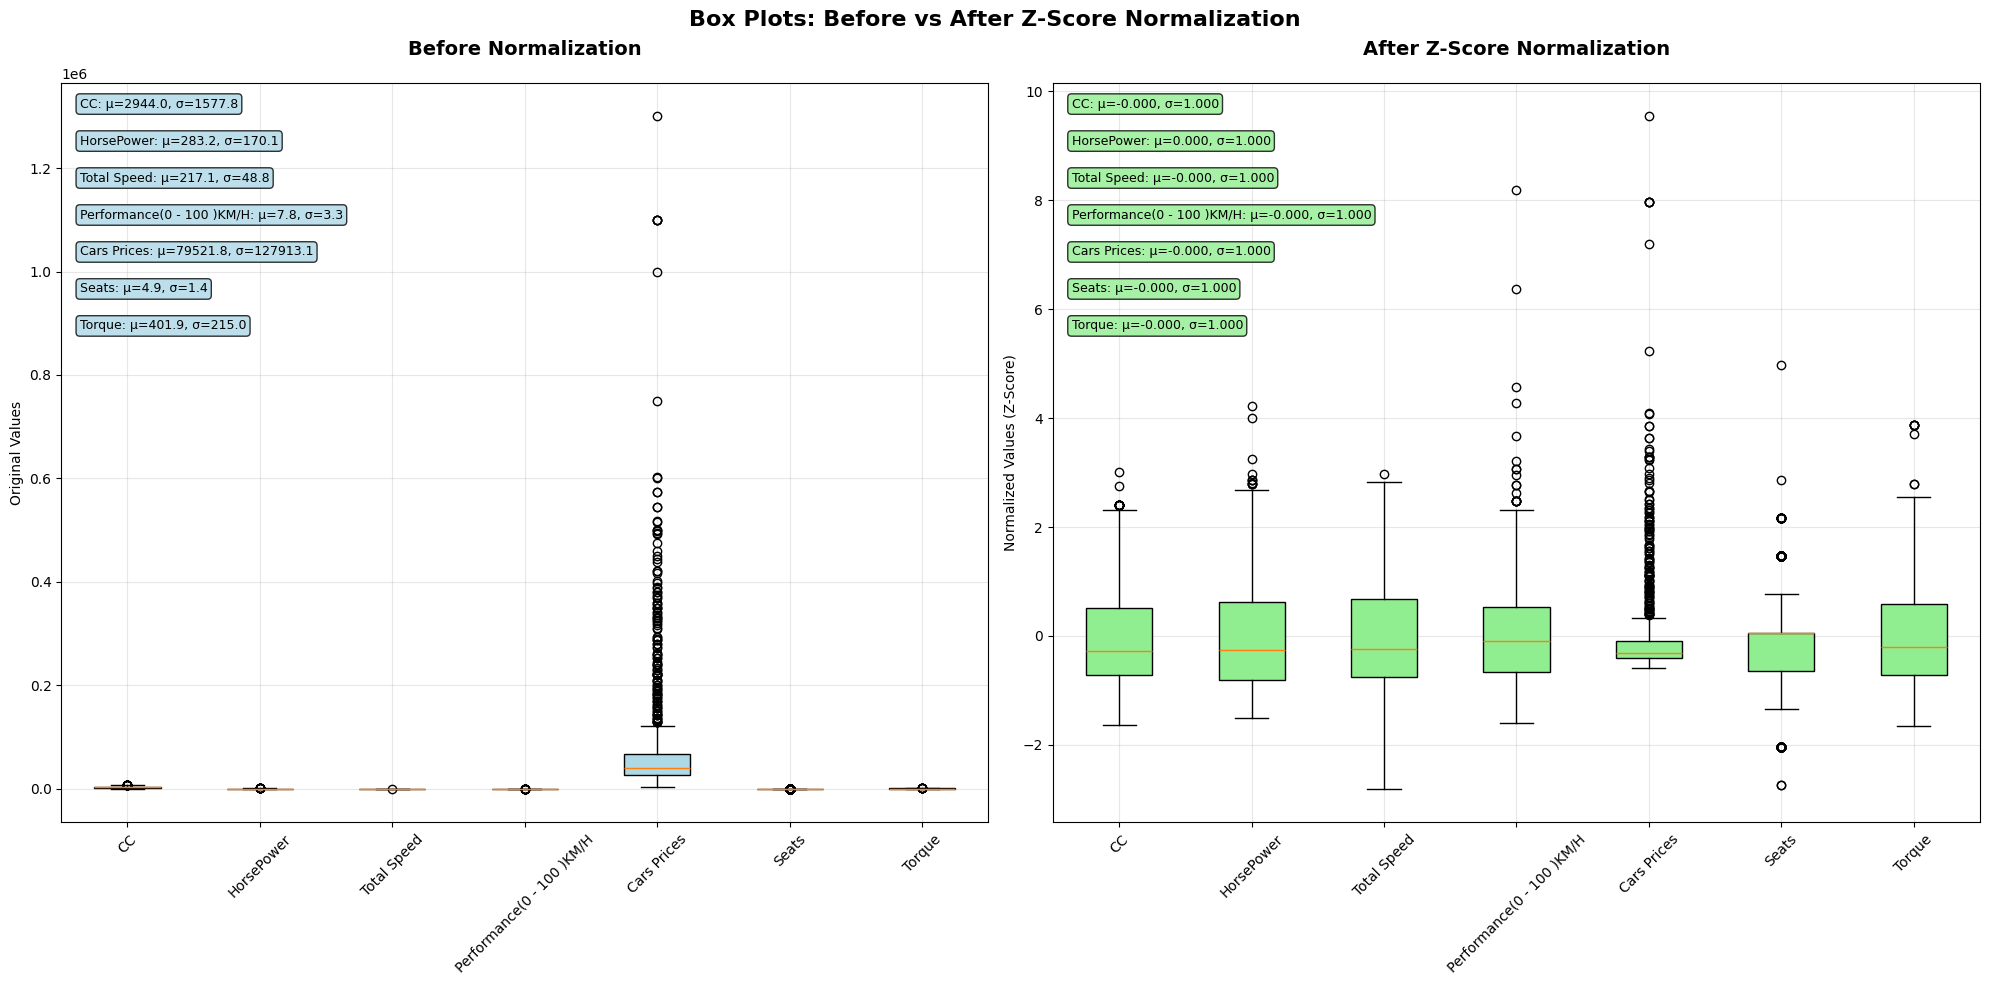

In [ ]:
# Create two separate box plots: one for original data and one for normalized data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Box Plots: Before vs After Z-Score Normalization', fontsize=16, fontweight='bold')

# Box plot for original (pre-normalized) data
original_data = [df_cleaned[col].dropna() for col in columns_to_analyze]
bp1 = ax1.boxplot(original_data, labels=columns_to_analyze, patch_artist=True)

# Color the boxes for original data
colors1 = ['lightblue'] * len(columns_to_analyze)
for patch, color in zip(bp1['boxes'], colors1):
    patch.set_facecolor(color)

ax1.set_title('Before Normalization', fontweight='bold', fontsize=14, pad=20)
ax1.set_ylabel('Original Values')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Box plot for normalized (post-normalized) data
normalized_data = [df_normalized[f'{col}_normalized'].dropna() for col in columns_to_analyze]
bp2 = ax2.boxplot(normalized_data, labels=columns_to_analyze, patch_artist=True)

# Color the boxes for normalized data
colors2 = ['lightgreen'] * len(columns_to_analyze)
for patch, color in zip(bp2['boxes'], colors2):
    patch.set_facecolor(color)

ax2.set_title('After Z-Score Normalization', fontweight='bold', fontsize=14, pad=20)
ax2.set_ylabel('Normalized Values (Z-Score)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Add statistics as text annotations with tighter spacing
for i, col in enumerate(columns_to_analyze):
    # Original data stats
    orig_mean = df_cleaned[col].mean()
    orig_std = df_cleaned[col].std()
    ax1.text(0.02, 0.98 - i*0.05, f'{col}: μ={orig_mean:.1f}, σ={orig_std:.1f}', 
             transform=ax1.transAxes, fontsize=9, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    # Normalized data stats
    norm_mean = df_normalized[f'{col}_normalized'].mean()
    norm_std = df_normalized[f'{col}_normalized'].std()
    ax2.text(0.02, 0.98 - i*0.05, f'{col}: μ={norm_mean:.3f}, σ={norm_std:.3f}', 
             transform=ax2.transAxes, fontsize=9, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()